## 1. 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.

## 1.1 필요한 라이브러리 가져오기

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1.2 시각화를 위한 폰트 설정

In [92]:
import matplotlib.pyplot as plt
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [93]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
# set_matplotlib_formats('retina')

## 1.3 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열)순으로 출력됩니다.

In [94]:
# read_csv로 불러온 파일을 df라는 변수에 담습니다.
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape

(91335, 39)

## 1.4 데이터 미리보기
* head, tail을 통해 데이터를 미리 볼 수 있습니다.


In [95]:
# shift + tab 키를 누르시면 docstring을 볼 수 있습니다.
# head로 데이터를 미리보기 합니다.
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [96]:
# tail로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [97]:
# sample로 미리보기를 합니다.
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
74444,12050651,한샘약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,2917011400109460010042024,NaN,광주광역시 북구 삼정로 74,500100.0,61158.0,NaN,1,NaN,126.937455,35.168511


## 1.5 데이터 요약하기

### 1.5.1 요약정보

In [98]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 1.5.2 컬럼명 보기

In [99]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 1.5.3 데이터 타입

In [100]:
# 데이터 타입만 출력합니다.
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 1.6 결측치

In [101]:
True == 1

True

In [102]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

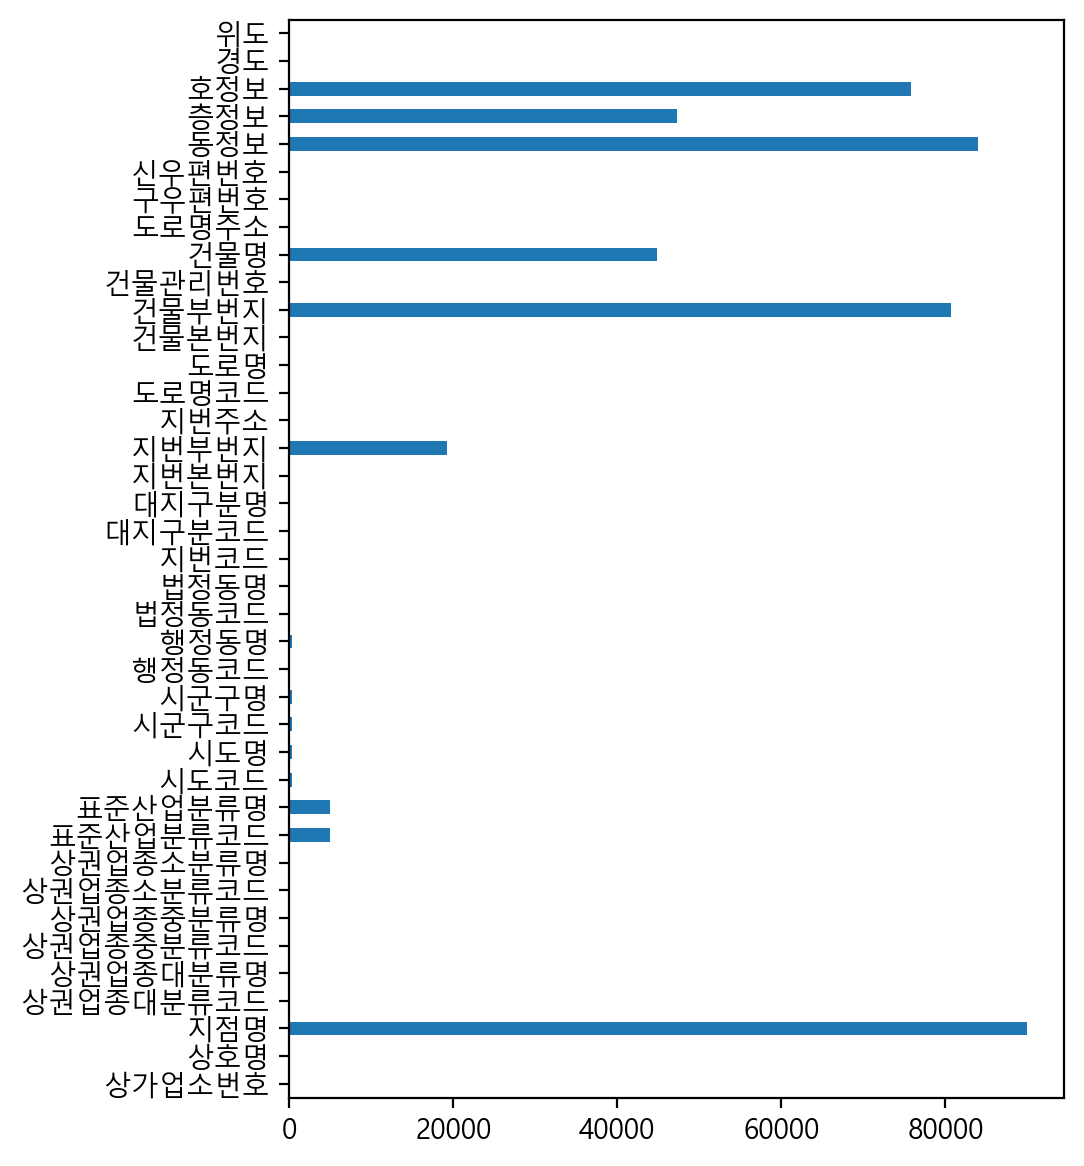

In [103]:
# 위에서 구한 결측치를 .plot.bar를 통해 막대그래프로 표현합니다.

null_count.plot.barh(figsize=(5, 7))

In [104]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head로 미리보기를 합니다.

df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 1.7 컬럼명 변경하기

In [105]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.

df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 1.8 정렬하기

In [106]:
# df_null_count 데이터프레임에 있는 결측치 수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


## 1.9 특정 컬럼만 불러오기

In [107]:
# 지점명 컬럼을 불러옵니다.
# NaN == Not a Number의 약자로 결측치를 의미합니다.

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [108]:
# "컬럼명"이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.

drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [109]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 1.10 제거하기

In [110]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [111]:
# 제거 결과를 info로 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 